In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd

In [113]:
df=pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin1')

In [114]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3093,ham,Have you emigrated or something? Ok maybe 5.30...,NaN,NaN,NaN
1434,ham,I asked sen to come chennai and search for job.,NaN,NaN,NaN
2119,ham,I hope you know I'm still mad at you.,NaN,NaN,NaN
2931,ham,Only 2% students solved this CAT question in '...,NaN,NaN,NaN
1752,ham,Give one miss from that number please,NaN,NaN,NaN


In [115]:
df.shape

(5572, 5)

In [116]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. improvement
# 7. deploy


#Data Cleaning


In [117]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [118]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [119]:
df.sample(5)

,v1,v2
2748,ham,Send his number and give reply tomorrow mornin...
2752,ham,Sat right? Okay thanks...
2432,ham,Really dun bluff me leh... U sleep early too. ...
2799,ham,"House-Maid is the murderer, coz the man was mu..."
5434,ham,Jesus armand really is trying to tell everybod...


In [120]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [121]:
df.sample(5)

,target,text
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...
2956,ham,I would but I'm still cozy. And exhausted from...
4957,ham,Why didn't u call on your lunch?
3350,ham,At what time are you coming.
3863,ham,A pure hearted person can have a wonderful smi...


In [122]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [123]:
df['target']=encoder.fit_transform(df['target'])

In [124]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [125]:
#check for duplicate values
df.duplicated().sum()

403

In [126]:
df=df.drop_duplicates(keep='first')

In [127]:
df.duplicated().sum()

0

In [128]:
df.shape

(5169, 2)

#EDA

In [129]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [131]:
import matplotlib.pyplot as plt

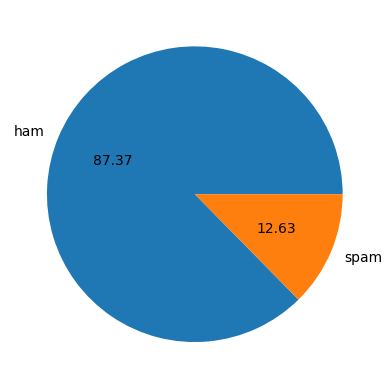

In [132]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [133]:
#data is imbalance

In [134]:
import nltk

In [135]:
df['num_characters']=df['text'].apply(len)

<ipython-input-135-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [136]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [137]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-138-14051c0e9706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [139]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [140]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-140-ff4d7395e232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [142]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [143]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [144]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [145]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

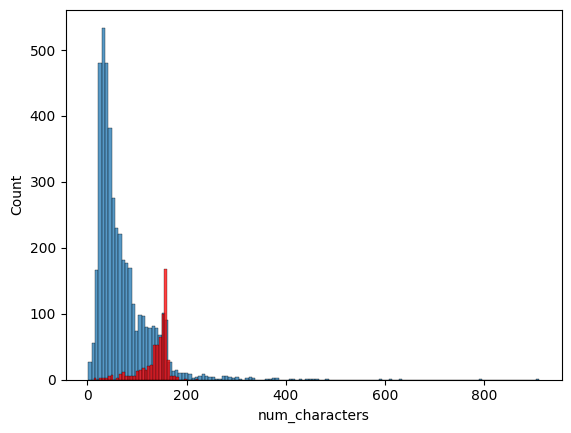

In [146]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

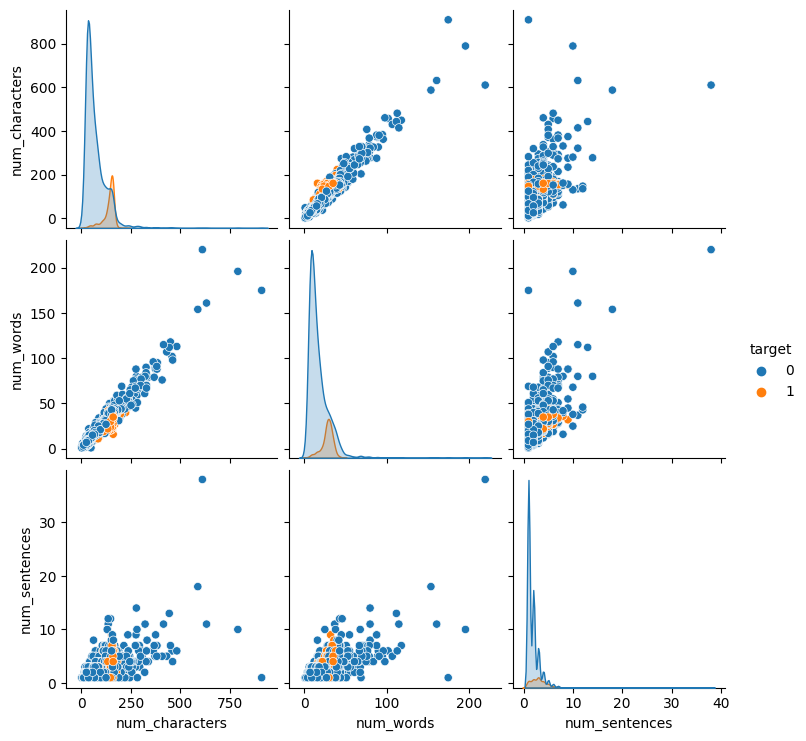

In [147]:
sns.pairplot(df,hue='target')

<ipython-input-148-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

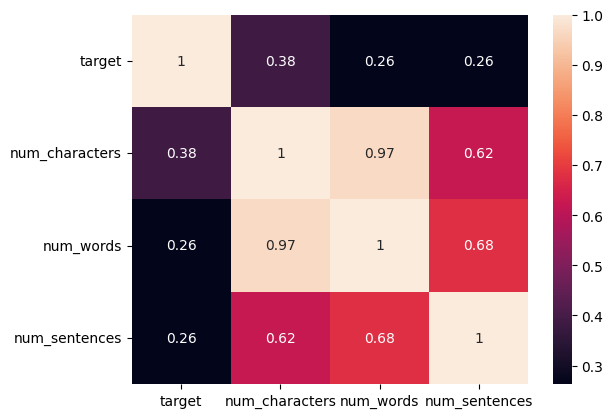

In [148]:
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [149]:
from nltk.corpus import stopwords

In [150]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
import string

In [152]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [153]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [154]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [155]:
transform_text('Hi how are you')

'hi'

In [156]:

ps.stem('loving')


'love'

In [157]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-157-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [160]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


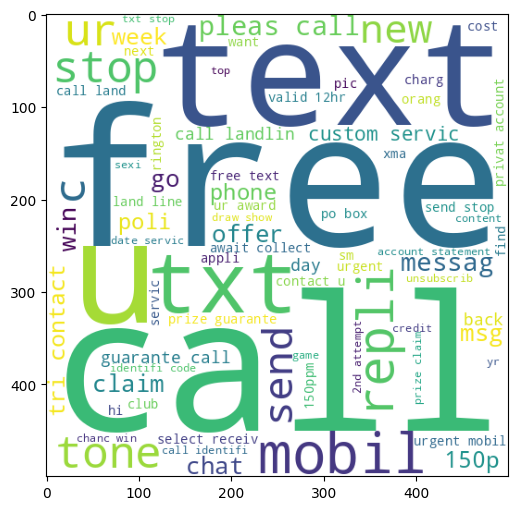

In [161]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [162]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

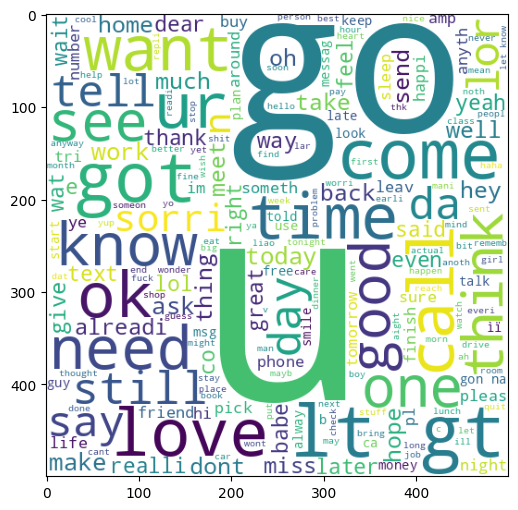

In [163]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [164]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [165]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [166]:
len(spam_corpus)

9939

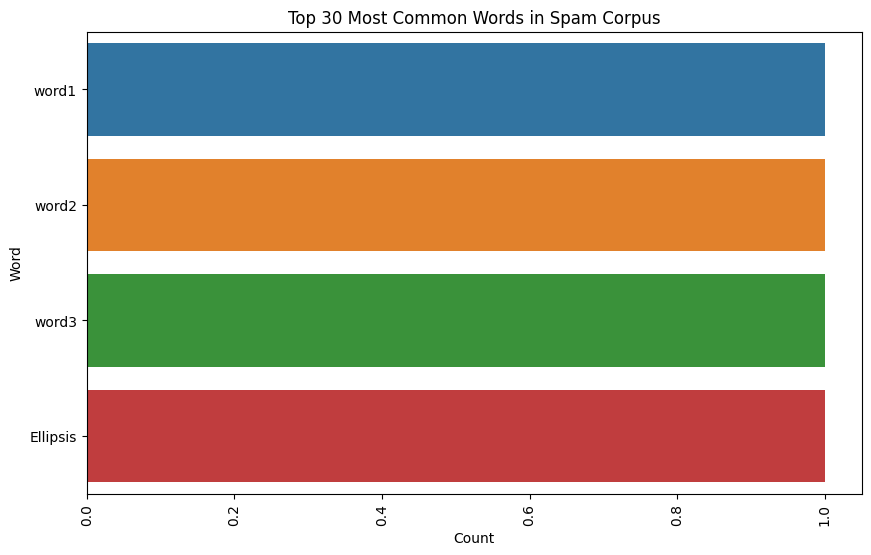

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming spam_corpus is a list of words
spam_corpus = ["word1", "word2", "word3", ...]

# Calculate word frequencies using Counter
word_counts = Counter(spam_corpus)

# Convert word frequencies to a DataFrame
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=df_word_counts)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.xticks(rotation='vertical')
plt.show()


In [168]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [169]:
len(ham_corpus)

35404

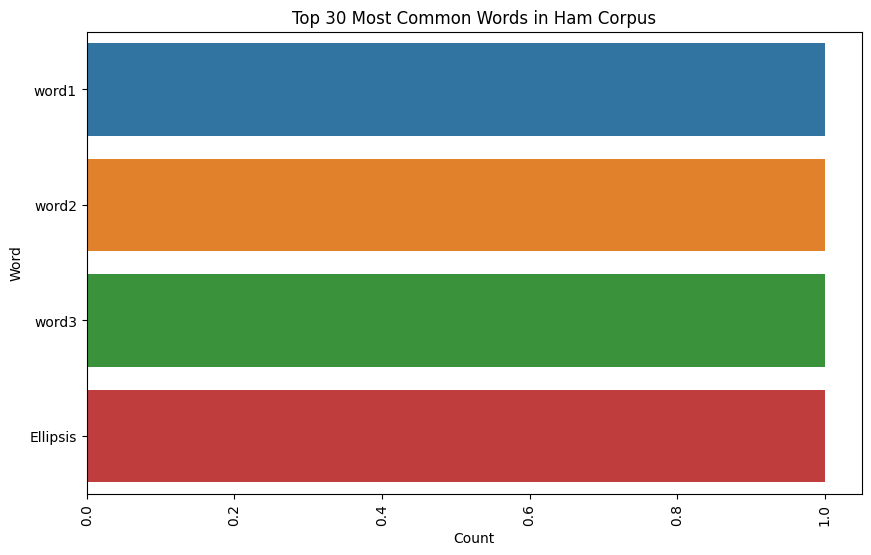

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming ham_corpus is a list of words
ham_corpus = ["word1", "word2", "word3", ...]

# Calculate word frequencies using Counter
word_counts = Counter(ham_corpus)

# Convert word frequencies to a DataFrame
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=df_word_counts)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.xticks(rotation='vertical')
plt.show()


#Model Building


In [171]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [172]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [173]:
# from sklearn.preprocessing import MinMaxScaler
# scaler  = MinMaxScaler()
# X = scaler.fit_transform(X)

In [174]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [175]:
X.shape

(5169, 3000)

In [176]:
y=df['target'].values

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [180]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [182]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [183]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [184]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [185]:
#tfidf with mnb

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [187]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [188]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [189]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [190]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [191]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [192]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision')

In [193]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.930368,0.836735
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
10,xgb,0.967118,0.926230
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
8,ETC,0.974855,0.974576
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
1,KN,0.905222,1.000000


In [194]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [195]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.930368
1,BgC,Accuracy,0.958414
2,GBDT,Accuracy,0.946809
3,xgb,Accuracy,0.967118
4,AdaBoost,Accuracy,0.960348
5,LR,Accuracy,0.958414
6,ETC,Accuracy,0.974855
7,SVC,Accuracy,0.975822
8,RF,Accuracy,0.975822
9,KN,Accuracy,0.905222


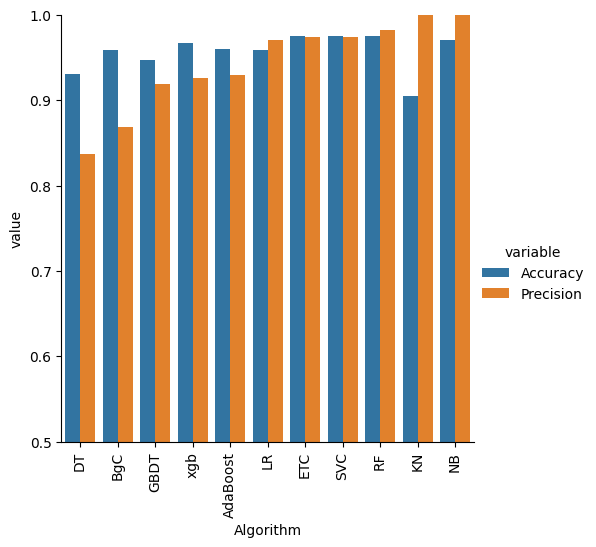

In [196]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [197]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [198]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

# Sort the DataFrame by a specific column, for example, 'Accuracy_max_ft_3000'
temp_df = temp_df.sort_values(by='Accuracy_max_ft_3000', ascending=False)


In [199]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
})

# Sort the DataFrame by the 'Accuracy_scaling' column in descending order
temp_df = temp_df.sort_values(by='Accuracy_scaling', ascending=False)


In [200]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [201]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [202]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
})

# Sort the DataFrame by the 'Accuracy_num_chars' column in descending order
temp_df = temp_df.sort_values(by='Accuracy_num_chars', ascending=False)


In [203]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,DT,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735
1,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
2,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
3,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
4,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
7,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
8,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
9,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000


In [204]:
#voting claasifier

In [205]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [206]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [207]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [208]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [209]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [210]:
from sklearn.ensemble import StackingClassifier

In [211]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [212]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [213]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))